### **I  analyze and predict customer  interactions and campaign effectiveness in insurance**
* I get data from Kaggle
* Inspected the data to understand its structure and content.
* In this data there are diffrent column -
  * age_group: The age group of the customer ex:-30-39,18-20
  * occupation: The occupation of the customer ex:-executive, technician
  * marital_status: The marital status of the customer ex:- married, single, divorced.
  * education_level: The highest education level attained by the customer ex:- high_school, college
  * communication_channel: The communication channel used for contacting the customer ex:-mobile, landline
  * call_day: The day of the month on which the call was made ex:-5, 15, 25
  * call_month: The month of the year in which the call was made ex:- January, May
  * call_duration: The duration of the call in seconds ex:-180, 300
  * call_frequency: The frequency of calls made to the customer ex:-1,3,5
  * previous_campaign_outcome: The outcome of the previous marketing campaign for the customer ex:-unsuccessful, successful
  * conversion_status: Whether the customer was converted or not.ex:-converted, not_converted
#### **Data Cleaning**
   * I have done data cleaning such as identify duplicates value ,null value,handling outliers etc prepare the data for modeling.
#### __Exploratory Data Analysis (EDA)__
   * I have done EDA on different column that could be useful for predictive modeling like Visualizations(histograms, bar plots, correlation)
#### **Model Building**
   * I have try various machine learning algorithms like , Random Forest, Decision Tree, and other models.I trained these models on the dataset to    predict customer conversion.
#### **Model Evaluation**
   * i have train model using accuracy score, r2 score.
#### **Model Selection**
  * after evalution i have select best model for customer interactions & campaign effectiveness in insurance.


#### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

#### The file format of data is csv that why i have taken read_csv.

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
data=df.copy()

#### By using head() we get top 5 row.

In [4]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


#### Describe function is used to get a descriptive statistics summary of a given dataframe

In [5]:
df.describe()

,age,call_day,call_duration,call_frequency
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


#### Getting summary of the data. It displays column names, data types, the number of non-null values, and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


## * **Data Preprocessing**


#### Checking the null value and it's sum 

In [7]:
df.isnull().sum()

occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64

#### Checking if Any Duplicate value and it's total

In [8]:
df.duplicated().sum()

6

#### Droping all the duplicates

In [9]:
df.drop_duplicates(inplace=True)

#### Getting unique value of column 

In [10]:
df.value_counts("occupation")

occupation
manual_worker           9730
executive               9457
technical_specialist    7596
administrative_staff    5170
service_worker          4153
retired_worker          2264
independent_worker      1579
business_owner          1487
jobless                 1303
domestic_worker         1240
student                  938
unidentified             288
Name: count, dtype: int64

#### Getting unique value of column 

In [11]:
df.value_counts("education_level")

education_level
high_school          23199
college              13299
elementary_school     6850
unidentified          1857
Name: count, dtype: int64

#### Getting unique value of column 

In [12]:
df.value_counts("marital_status")

marital_status
married     27210
single      12788
divorced     5207
Name: count, dtype: int64

#### Getting unique value of column 

In [13]:
df.value_counts("call_month")

call_month
May          13765
July          6894
August        6245
June          5339
November      3970
April         2932
February      2649
January       1403
October        738
September      579
March          477
December       214
Name: count, dtype: int64

#### Getting unique value of column 

In [14]:
df.value_counts("communication_channel")

communication_channel
mobile          29282
unidentified    13017
landline         2906
Name: count, dtype: int64

#### Getting unique value of column 

In [15]:
df.value_counts("previous_campaign_outcome")

previous_campaign_outcome
unidentified     36953
unsuccessful      4901
other_outcome     1840
successful        1511
Name: count, dtype: int64

#### Getting unique value of column 

In [16]:
df.value_counts("conversion_status")

conversion_status
not_converted    39916
converted         5289
Name: count, dtype: int64

#### Plot Box by we are getting outliers after 70 in boxplot so droping it because if outliers are there in data it will affect in model

<Axes: >

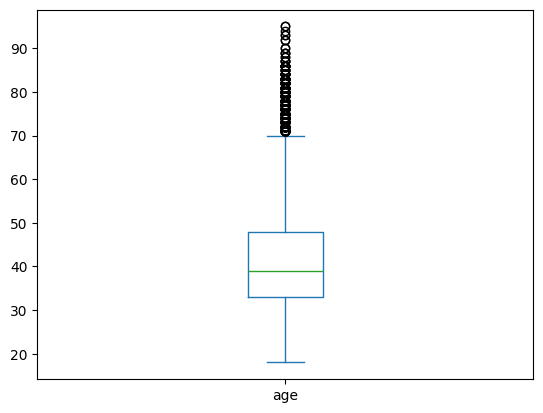

In [100]:
df["age"].plot.box()

#### By using this we will get the tentive value of outliers

In [18]:
df["age"].quantile(.98)

63.0

#### Saving this in new_df of outliers

In [19]:
new_df=df[df["age"] < df["age"].quantile(.98)]

#### After saving in new_df again ploting by boxplot

<Axes: >

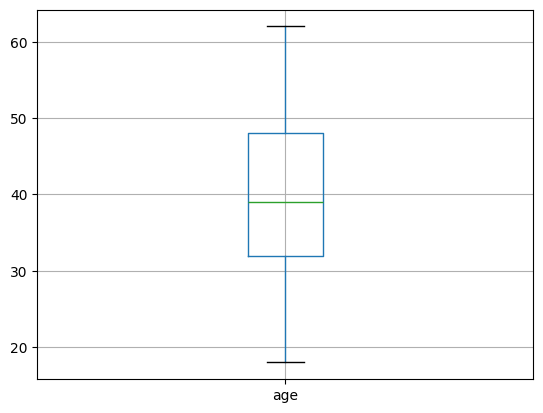

In [20]:
new_df.boxplot("age")

#### Plot Box by we are getting outliers after 1000 in boxplot so droping it because if outliers are there in data it will affect in model

<Axes: >

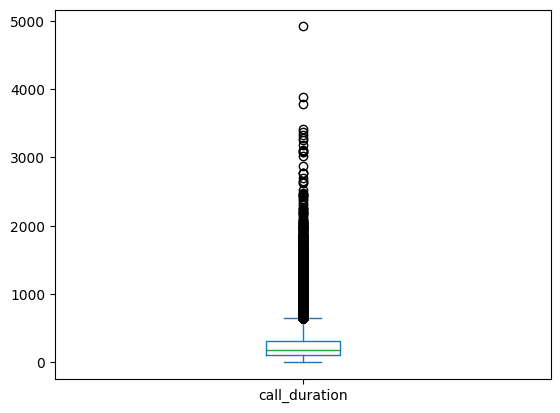

In [21]:
df["call_duration"].plot.box()

#### By using this we will get the tentive value of outliers

In [22]:
df["call_duration"].quantile(.85)

437.0

#### Saving this in new_df of outliers

In [23]:
new_df=df[df["call_duration"] < df["call_duration"].quantile(.85)]

#### After saving in new_df again ploting by boxplot

<Axes: >

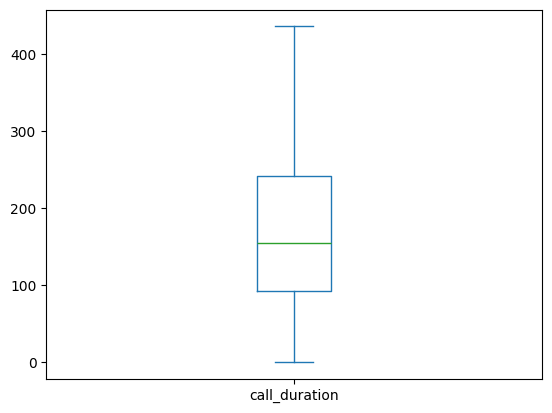

In [24]:
new_df["call_duration"].plot.box()

#### Plot Box by we are getting outliers after 10 in boxplot so droping it because if outliers are there in data it will affect in model

<Axes: >

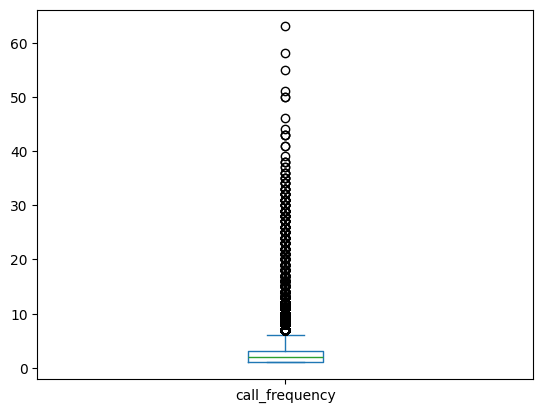

In [25]:
df["call_frequency"].plot.box()

#### By using this we will get the tentive value of outliers

In [26]:
df["call_frequency"].quantile(.94)

7.0

#### Saving this in new_df varible of outliers

In [27]:
new_df=df[df["call_frequency"] < df["call_frequency"].quantile(.94)]

#### After saving in new_df again ploting by boxplot

<Axes: >

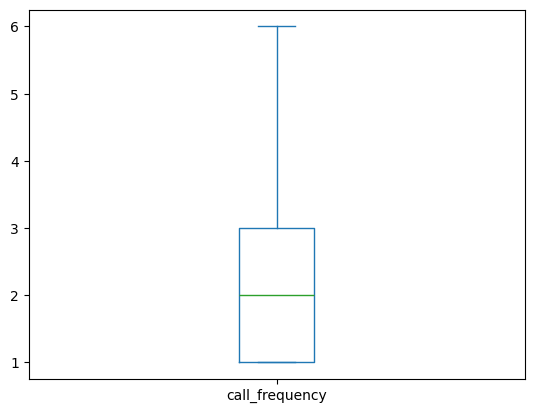

In [28]:
new_df["call_frequency"].plot.box()

## **Exploratory Data Analysis (EDA)**

#### Plotting occupation by counplot 
* plt.title("Distribution Occuption"): This line sets the title of the plot
* sns.countplot(x=df["occupation"]): countplot function to create a bar plot showing the counts of unique values in the "conversion_status" column of the DataFrame df. The x parameter specifies the column to plot on the x-axis
* plt.show(): it will show plot

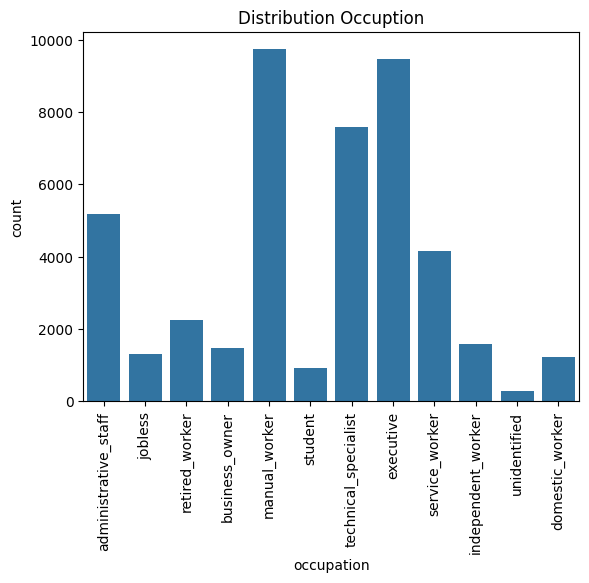

In [29]:
plt.title("Distribution Occuption")
plt.xticks(rotation=90)
sns.countplot(x=df["occupation"])
plt.show()

#### Plotting communication by counplot 
* plt.title("communication"): This line sets the title of the plot
* sns.countplot(x=df["communication_channel"]): countplot function to create a bar plot showing the counts of unique values in the "conversion_status" column of the DataFrame df. The x parameter specifies the column to plot on the x-axis
* plt.show(): it will show plot

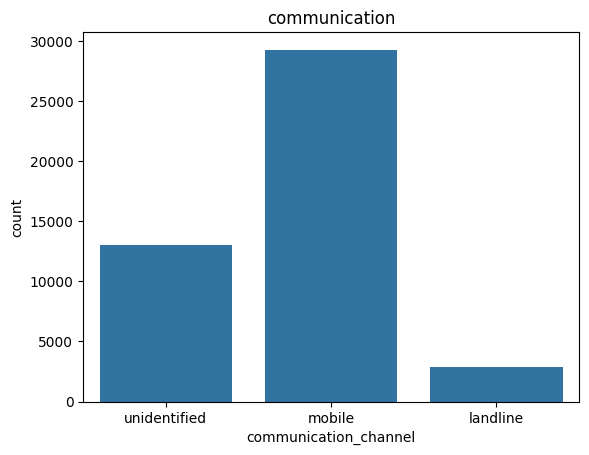

In [30]:
plt.title("communication")
sns.countplot(x=df["communication_channel"])
plt.show()

#### Plotting conversion status by counplot
* plt.title("Customer was converted or not"): This line sets the title of the plot
* sns.countplot(x=df["conversion_status"]): countplot function to create a bar plot showing the counts of unique values in the "conversion_status" column of the DataFrame df. The x parameter specifies the column to plot on the x-axis
* plt.show(): it will show plot

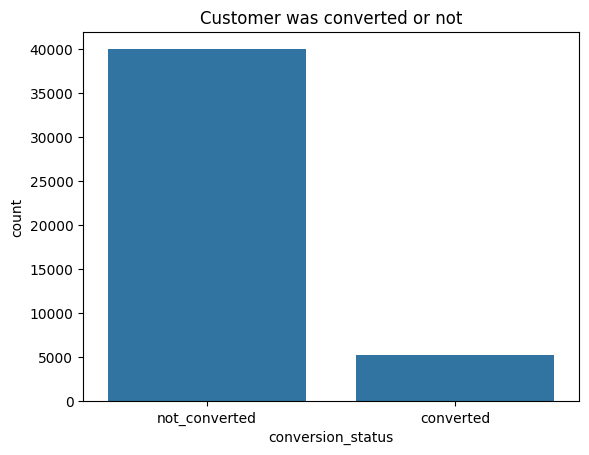

In [31]:
plt.title("Customer was converted or not")
sns.countplot(x=df["conversion_status"])
plt.show()


#### Plotting education level  by counplot
* plt.title("Education level"): This line sets the title of the plot
* sns.countplot(x=df["education_level"]): countplot function to create a bar plot showing the counts of unique values in the "conversion_status" column of the DataFrame df. The x parameter specifies the column to plot on the x-axis
* plt.show(): it will show plot

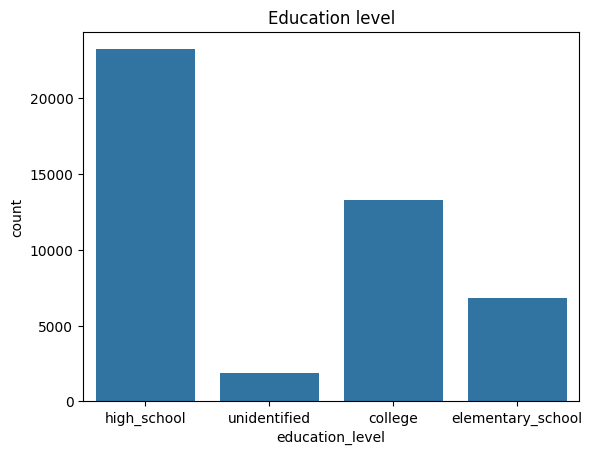

In [32]:
plt.title("Education level")
sns.countplot(x=df["education_level"])
plt.show()

#### Plotting conversion marital status by counplot
* plt.title("customer martial status"): This line sets the title of the plot
* sns.countplot(x=df["marital_status"]):countplot function to create a bar plot showing the counts of unique values in the "conversion_status" column of the DataFrame df. The x parameter specifies the column to plot on the x-axis
* plt.show(): it will show plot

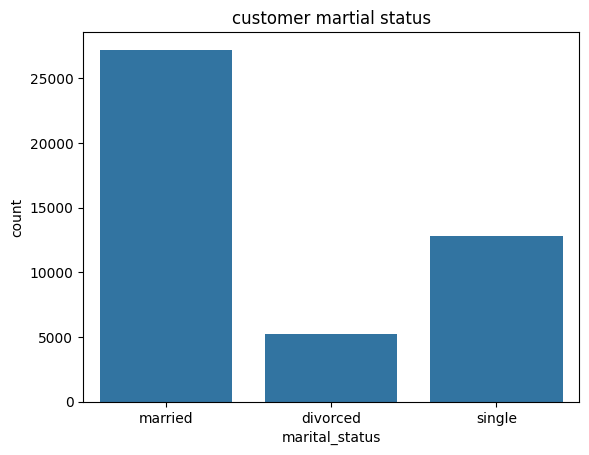

In [33]:
plt.title("customer martial status")
sns.countplot(x=df["marital_status"])
plt.show()

#### Plotting call month by counplot
* plt.title("Call month"): This line sets the title of the plot
* sns.countplot(x=df["call_month"]): countplot function to create a bar plot showing the counts of unique values in the "conversion_status" column of the DataFrame df. The x parameter specifies the column to plot on the x-axis
* plt.show(): it will show plot

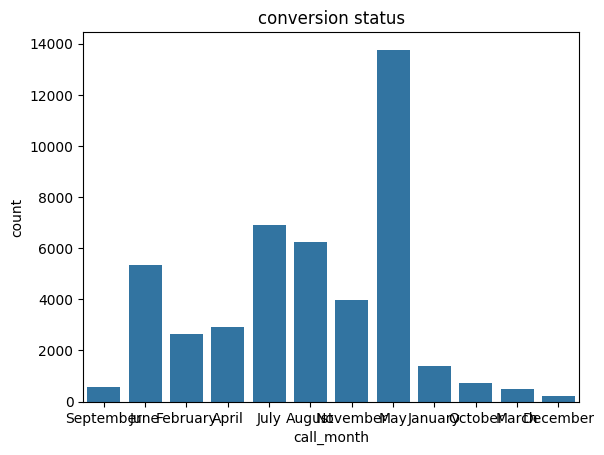

In [34]:
plt.title("conversion status")
sns.countplot(x=df["call_month"])
plt.show()

#### Plotting conversion status by counplot
* plt.title("conversion status"): This line sets the title of the plot
* sns.countplot(x=df["conversion_status"]): countplot function to create a bar plot showing the counts of unique values in the "conversion_status" column of the DataFrame df. The x parameter specifies the column to plot on the x-axis
* plt.show(): it will show plot

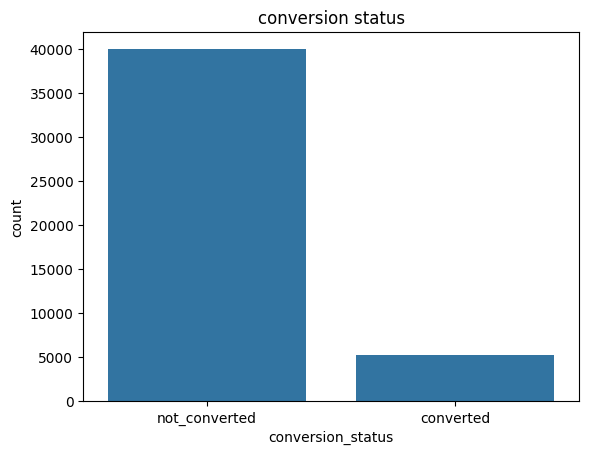

In [35]:
plt.title("conversion status")
sns.countplot(x=df["conversion_status"])
plt.show()

#### By using lambda function convert categorical variables into numerical format like if it's married give 0,if it's single 1 and divorce 2 

In [36]:
df['marital_status']=list(map(lambda x: 0 if x=='married' else(1 if x=='single' else 2), df['marital_status']))

#### By using lambda function convert categorical variables into numerical format like if it's mobile give 0,if it's landline 1 and unidentified 2 

In [37]:
df['communication_channel']=list(map(lambda x: 0 if x=='mobile' else(1 if x=='landline' else 2), df['communication_channel']))

#### By using map function  convert categorical variables into numerical format if it's january give 1,if it's february 2 and and so on

In [38]:
months_Call={
    "January":1,
    "February":2,
    "March":3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8,
    "September":9,
    "October":10,
    "November":11,
    "December":12
}

#### Creating new column months and saving above null in months

In [39]:
df["Months"]=df["call_month"].map(months_Call)

In [40]:
df["Months"]

0        9
1        6
2        2
3        4
4        7
        ..
45206    5
45207    5
45208    6
45209    7
45210    5
Name: Months, Length: 45205, dtype: int64

#### Droping call month because created new column i.e months of call months

In [41]:
df.drop("call_month",axis=1,inplace=True)

#### By using lambda function convert categorical variables into numerical format like if it's converted give 0,if it's not converted 1

In [42]:
df['conversion_status']=list(map(lambda x: 0 if x=='converted' else(1 if x=='not_converted' else 2), df['conversion_status']))

#### Checking if above changes applied to data or not

In [43]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,Months
0,administrative_staff,28,high_school,0,2,9,1,1,successful,1,9
1,administrative_staff,58,unidentified,0,2,5,307,2,unidentified,1,6
2,jobless,40,high_school,2,0,4,113,1,unidentified,1,2
3,retired_worker,63,high_school,0,0,7,72,5,unidentified,1,4
4,business_owner,43,college,0,1,29,184,4,unidentified,1,7


#### Importing library

In [44]:
from sklearn.preprocessing import LabelEncoder

#### Creates an instance of the LabelEncoder class and assigns it to the variable model

In [45]:
model = LabelEncoder()

#### By using LabelEncoder convert categorical variables into numerical format

In [46]:
model.fit_transform(df['occupation'])

array([ 0,  0,  5, ...,  3,  7, 10])

#### By using LabelEncoder convert categorical variables into numerical format

In [47]:
model.fit_transform(df['education_level'])

array([2, 3, 2, ..., 0, 1, 0])

#### By using LabelEncoder convert categorical variables into numerical format

In [48]:
model.fit_transform(df['previous_campaign_outcome'])

array([1, 2, 2, ..., 0, 2, 2])

#### After creating the LabelEncoder object,  use its methods, such as fit_transform(), to encode categorical labels into numerical values.

In [49]:
df['occupation']= model.fit_transform(df['occupation']) 
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,Months
0,0,28,high_school,0,2,9,1,1,successful,1,9
1,0,58,unidentified,0,2,5,307,2,unidentified,1,6
2,5,40,high_school,2,0,4,113,1,unidentified,1,2
3,7,63,high_school,0,0,7,72,5,unidentified,1,4
4,1,43,college,0,1,29,184,4,unidentified,1,7


#### After creating the LabelEncoder object,  use its methods, such as fit_transform(), to encode categorical labels into numerical values.

In [50]:
df['previous_campaign_outcome']= model.fit_transform(df['previous_campaign_outcome']) 
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,Months
0,0,28,high_school,0,2,9,1,1,1,1,9
1,0,58,unidentified,0,2,5,307,2,2,1,6
2,5,40,high_school,2,0,4,113,1,2,1,2
3,7,63,high_school,0,0,7,72,5,2,1,4
4,1,43,college,0,1,29,184,4,2,1,7


#### After creating the LabelEncoder object,  use its methods, such as fit_transform(), to encode categorical labels into numerical values.

In [51]:
df['education_level']= model.fit_transform(df['education_level']) 
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,Months
0,0,28,2,0,2,9,1,1,1,1,9
1,0,58,3,0,2,5,307,2,2,1,6
2,5,40,2,2,0,4,113,1,2,1,2
3,7,63,2,0,0,7,72,5,2,1,4
4,1,43,0,0,1,29,184,4,2,1,7


#### By using Correlation matrix evaluate the relationship between two variables in a data set

* corr_matrix = df.corr(): correlation matrix for a DataFrame df. The corr() method computes pairwise correlation of columns.
* plt.figure(figsize=(10, 8)): This line creates a figure object for plotting using Matplotlib with a specified figure size of 10 inches by 8 inches.
* sns.heatmap(corr_matrix, annot=True): This line uses Seaborn's heatmap function to create a heatmap visualization of the correlation matrix (corr_matrix). The annot=True parameter adds numerical annotations to the heatmap cells, showing the actual correlation values.
* plt.title('Correlation Matrix'): This line sets the title of the plot to 'Correlation Matrix'.
* plt.show(): it will show plot

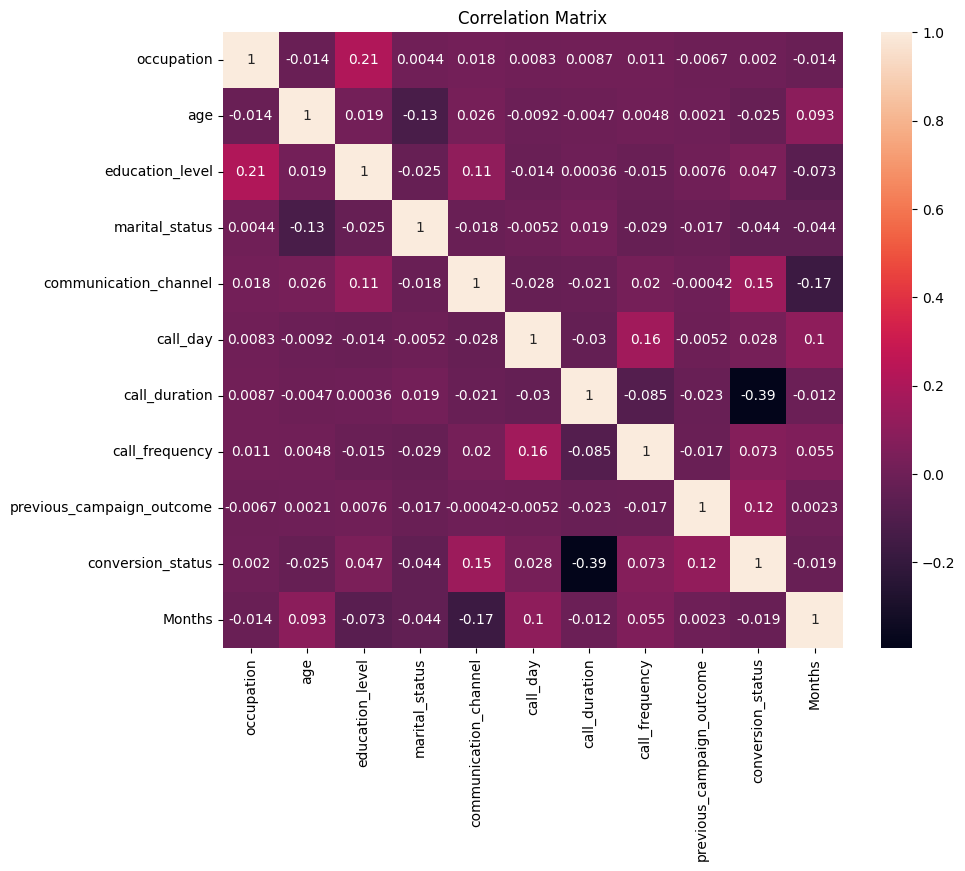

In [101]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

#### Correlation of columns
* df[["age","conversion_status"]]: This part of the code selects the columns "age" and "conversion_status" from the DataFrame df. The double square brackets [[...]] are used to create a DataFrame containing only these two columns.
* 
.corr(method="pearson"): This part of the code calculates the correlation between the selected columns.

In [53]:
df[["age","conversion_status"]].corr(method="pearson") 

,age,conversion_status
age,1.000000,-0.025126
conversion_status,-0.025126,1.000000


#### Correlation of columns
* df[["occupation","conversion_status"]]: This part of the code selects the columns "occupation" and "conversion_status" from the DataFrame df. The double square brackets [[...]] are used to create a DataFrame containing only these two columns.

* .corr(method="pearson"): This part of the code calculates the correlation between the selected columns.

In [54]:
df[["occupation","conversion_status"]].corr(method="pearson") 

,occupation,conversion_status
occupation,1.000000,0.001993
conversion_status,0.001993,1.000000


#### Correlation of columns
* df[["communication_channel","conversion_status"]]: This part of the code selects the columns "communication_channel" and "conversion_status" from the DataFrame df. The double square brackets [[...]] are used to create a DataFrame containing only these two columns.

* .corr(method="pearson"): This part of the code calculates the correlation between the selected columns.

In [55]:
df[["communication_channel","conversion_status"]].corr(method="pearson")

,communication_channel,conversion_status
communication_channel,1.000000,0.148391
conversion_status,0.148391,1.000000


#### Correlation of columns
* df[["previous_campaign_outcome","conversion_status"]]: This  code selects the columns "previous_campaign_outcome" and "conversion_status" from the DataFrame df. The double square brackets [[...]] are used to create a DataFrame containing only these two columns.

* .corr(method="pearson"): This part of the code calculates the correlation between the selected columns.

In [56]:
df[["previous_campaign_outcome","conversion_status"]].corr(method="pearson") 

,previous_campaign_outcome,conversion_status
previous_campaign_outcome,1.000000,0.117226
conversion_status,0.117226,1.000000


#### Droping conversio status it target column
* X: A DataFrame containing all the features except the "conversion_status" column.* 
y: A Series containing the "conversion_status" column values, which represent the target variable.

In [57]:
X=df.drop("conversion_status",axis=1)
y=df["conversion_status"]

#### Spliting dataset into traing and testing
* train_test_split function divides into two sets: training set (X_train, y_train) and testing set (X_test, y_test).

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_test

,occupation,age,education_level,marital_status,communication_channel,call_day,call_duration,call_frequency,previous_campaign_outcome,Months
22091,6,33,1,1,2,7,102,1,2,5
22762,10,46,2,0,1,31,43,5,2,7
44927,3,41,0,0,2,20,7,3,2,6
8807,3,29,0,1,0,28,154,2,3,1
18647,3,49,1,1,1,31,115,6,2,7
...,...,...,...,...,...,...,...,...,...,...
3344,6,32,2,1,0,28,86,4,2,7
10135,6,33,2,0,0,7,1063,1,2,4
21082,3,32,2,1,2,23,139,1,2,5
13596,10,46,2,2,2,26,200,3,2,5


In [60]:
X_train

,occupation,age,education_level,marital_status,communication_channel,call_day,call_duration,call_frequency,previous_campaign_outcome,Months
23090,0,32,2,2,0,14,90,2,2,7
6633,3,46,0,1,2,18,107,1,2,6
313,6,51,1,0,2,26,153,1,2,5
16522,8,41,1,2,0,31,73,1,2,7
44313,6,29,1,0,2,28,165,1,2,5
...,...,...,...,...,...,...,...,...,...,...
11284,10,46,2,0,2,5,92,1,2,6
44738,8,47,2,0,2,12,112,1,2,6
38162,6,39,2,0,0,21,239,2,3,11
860,4,32,0,0,0,20,228,1,2,11


* Shape of X_train

In [61]:
X_train.shape

(36164, 10)

* Shape of X_test

In [62]:
X_test.shape

(9041, 10)

## **Model Building**

### * Bulding model with LogisticRegression
   * Logistic Regression is a widely used statistical technique for binary classification tasks, using in model building has reasons:
      * Logistic Regression provides straightforward interpretation of results.
      *  Logistic Regression can be regularized to prevent overfittingon

* LogisticRegression() creates an instance of the Logistic Regression algorithm and assigns it to the variable model.

In [63]:
lr=LogisticRegression()

* it is used to train (fit) a machine learning model using training data

In [64]:
lr.fit(X_train,y_train)

LogisticRegression()

* It is used to make predictions using a trained machine learning model (model) on new, unseen data (X_test).

In [65]:
y_pred=lr.predict(X_test)

* This function  calculate the accuracy  model's predictions.

In [66]:
accuracy_score(y_test,y_pred)

0.890388231390333

### * Bulding model with LogisticRegression 
   * The KNeighborsClassifier algorithm is a type of instance-based or lazy learning algorithm used for classification task.
   *  KNN can be applied to both classification and regression tasks.


* KNeighborsClassifier() creates an instance of the KNeighborsClassifier algorithm and assigns it to the variable knn.

In [67]:
knn = KNeighborsClassifier(n_neighbors=7)

* it is used to train (fit) a machine learning model using training data

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

* It is used to make predictions using a trained machine learning model (model) on new, unseen data (X_test).

In [69]:
y_pred = knn.predict(X_test)

* This function  calculate the accuracy  model's predictions.

In [70]:
accuracy_score(y_test, y_pred)

0.886627585444088

### * Bulding model with RandomForestClassifier
  * Random Forests often achieve high accuracy in classification tasks. They are robust against overfitting, especially when compared to individual decision trees, because they aggregate predictions from multiple trees (ensemble method).
  *  Random Forests can handle missing values in the dataset without requiring imputation.

* RandomForestClassifier() creates an instance of the RandomForestClassifier algorithm and assigns it to the variable RFC.

In [71]:
rfc=RandomForestClassifier()

* it is used to train (fit) a machine learning model using training data

In [72]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

* It is used to make predictions using a trained machine learning model (model) on new, unseen data (X_test).

In [73]:
y_pr=rfc.predict(X_test)

* This function  calculate the accuracy  model's predictions.

In [74]:
accuracy_score(y_test,y_pr)

0.9065368875124433

### * Bulding model with Decision TreeRegressor
   * Decision trees can handle both numerical and categorical data without requiring one-hot encoding for categorical variables.
   * Decision trees are less sensitive to outliers and missing values compared to some other algorithms, reducing the need for extensive data preprocessing.

* DecisionTreeRegressor() creates an instance of the DecisionTreeRegressor algorithm and assigns it to the variable dtr.

In [75]:
dtr=DecisionTreeRegressor()

* it is used to train (fit) a machine learning model using training data

In [76]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

* It is used to make predictions using a trained machine learning model (model) on new, unseen data (X_test).

In [77]:
y_pred=dtr.predict(X_test)

* This function  calculate the accuracy  model's predictions.

In [78]:
accuracy_score(y_test,y_pred)

0.8724698595288132

### * Bulding model with Linear Regression
   * Linear Regression provides straightforward interpretability as the relationship between the independent variables and the dependent variable is represented by coefficients.
   * Training and making predictions with Linear Regression are computationally efficient, especially for large datasets with many features.ta

* LinearRegression() creates an instance of the Linear Regression algorithm and assigns it to the variable LR.

In [79]:
lr2=LinearRegression()

* it is used to train (fit) a machine learning model using training data

In [80]:
lr2.fit(X_train,y_train)

LinearRegression()

* It is used to make predictions using a trained machine learning model (model) on new, unseen data (X_test).

In [81]:
y_pred=lr2.predict(X_test)

* function calculates the coefficient of determination (R-squared) to evaluate the performance of a regression model

In [82]:
r2_score(y_test,y_pred)

0.1713788779024099

### **Conclusion**
* #### After doing all tha analysis and model fiting  i can say Random Forest has a higher accuracy, so it is a better model.

In [102]:
m = []
for model in [lr, dtr, rfc, knn,lr2]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    m.append({"Model": str(model), "R2 Score": r2, "Mean Squared Error": mse})

In [103]:
m

[{'Model': 'LogisticRegression()',
  'R2 Score': -0.09418312690360287,
  'Mean Squared Error': 0.10961176860966708},
 {'Model': 'DecisionTreeRegressor()',
  'R2 Score': -0.2620093986385652,
  'Mean Squared Error': 0.12642406813405596},
 {'Model': 'RandomForestClassifier()',
  'R2 Score': 0.05597722149083706,
  'Mean Squared Error': 0.09456918482468754},
 {'Model': 'KNeighborsClassifier(n_neighbors=7)',
  'R2 Score': -0.13172321400221287,
  'Mean Squared Error': 0.11337241455591196},
 {'Model': 'LinearRegression()',
  'R2 Score': 0.1713788779024099,
  'Mean Squared Error': 0.08300861571268364}]

In [104]:
model_details = pd.DataFrame(m)

In [105]:
model_details

,Model,R2 Score,Mean Squared Error
0,LogisticRegression(),-0.094183,0.109612
1,DecisionTreeRegressor(),-0.262009,0.126424
2,RandomForestClassifier(),0.055977,0.094569
3,KNeighborsClassifier(n_neighbors=7),-0.131723,0.113372
4,LinearRegression(),0.171379,0.083009
